# **Analysis**

In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [57]:
class LoanApprovalConfig:
    train_path = '/kaggle/input/playground-series-s4e10/train.csv'
    test_path = '/kaggle/input/playground-series-s4e10/test.csv'
    
config = LoanApprovalConfig


In [58]:
trainSet = pd.read_csv(config.train_path)
testSet = pd.read_csv(config.test_path)

In [59]:
trainSet.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [60]:
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [61]:
object_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

# **Preprocessing**

We need to convert text data into numerical data. Since most of the fields are categorical in nature OneHotEncoder is best suited for the needs.

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = make_pipeline(OneHotEncoder())

In [63]:
from sklearn.compose import make_column_transformer, make_column_selector
preProcessingTransformer = make_column_transformer((cat_pipeline, make_column_selector(dtype_include=object)),
                                                  remainder='passthrough')
preprocessedArray = preProcessingTransformer.fit_transform(trainSet)
preProcessingTransformer.get_feature_names_out()
train = pd.DataFrame(preprocessedArray, columns=preProcessingTransformer.get_feature_names_out())

In [64]:
train.sample(20)

,pipeline__person_home_ownership_MORTGAGE,pipeline__person_home_ownership_OTHER,pipeline__person_home_ownership_OWN,pipeline__person_home_ownership_RENT,pipeline__loan_intent_DEBTCONSOLIDATION,pipeline__loan_intent_EDUCATION,pipeline__loan_intent_HOMEIMPROVEMENT,pipeline__loan_intent_MEDICAL,pipeline__loan_intent_PERSONAL,pipeline__loan_intent_VENTURE,...,pipeline__cb_person_default_on_file_Y,remainder__id,remainder__person_age,remainder__person_income,remainder__person_emp_length,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__loan_status
24946,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,24946.0,25.0,42000.0,4.0,3000.0,11.49,0.07,4.0,0.0
16220,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,16220.0,23.0,42996.0,7.0,2000.0,13.49,0.05,3.0,0.0
56326,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,56326.0,23.0,70000.0,7.0,9000.0,7.49,0.13,4.0,0.0
4047,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,4047.0,26.0,108000.0,2.0,20000.0,15.31,0.19,4.0,1.0
26347,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,26347.0,22.0,40000.0,0.0,7000.0,12.73,0.17,3.0,0.0
25442,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,25442.0,25.0,42000.0,0.0,5000.0,13.49,0.12,2.0,0.0
26209,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,26209.0,23.0,54000.0,5.0,5000.0,12.73,0.09,3.0,0.0
31805,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,31805.0,22.0,56000.0,3.0,8000.0,7.49,0.14,3.0,0.0
49056,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,49056.0,36.0,54000.0,2.0,4500.0,10.62,0.08,11.0,0.0
35943,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,35943.0,36.0,235000.0,0.0,25000.0,13.61,0.11,13.0,0.0


In [65]:
train.describe()

,pipeline__person_home_ownership_MORTGAGE,pipeline__person_home_ownership_OTHER,pipeline__person_home_ownership_OWN,pipeline__person_home_ownership_RENT,pipeline__loan_intent_DEBTCONSOLIDATION,pipeline__loan_intent_EDUCATION,pipeline__loan_intent_HOMEIMPROVEMENT,pipeline__loan_intent_MEDICAL,pipeline__loan_intent_PERSONAL,pipeline__loan_intent_VENTURE,...,pipeline__cb_person_default_on_file_Y,remainder__id,remainder__person_age,remainder__person_income,remainder__person_emp_length,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__loan_status
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,0.423293,0.001518,0.053508,0.521681,0.155734,0.209242,0.107085,0.186444,0.170790,0.170705,...,0.148384,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,0.494085,0.038927,0.225047,0.499534,0.362606,0.406771,0.309224,0.389468,0.376329,0.376254,...,0.355484,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   pipeline__person_home_ownership_MORTGAGE  58645 non-null  float64
 1   pipeline__person_home_ownership_OTHER     58645 non-null  float64
 2   pipeline__person_home_ownership_OWN       58645 non-null  float64
 3   pipeline__person_home_ownership_RENT      58645 non-null  float64
 4   pipeline__loan_intent_DEBTCONSOLIDATION   58645 non-null  float64
 5   pipeline__loan_intent_EDUCATION           58645 non-null  float64
 6   pipeline__loan_intent_HOMEIMPROVEMENT     58645 non-null  float64
 7   pipeline__loan_intent_MEDICAL             58645 non-null  float64
 8   pipeline__loan_intent_PERSONAL            58645 non-null  float64
 9   pipeline__loan_intent_VENTURE             58645 non-null  float64
 10  pipeline__loan_grade_A            

array([[<Axes: title={'center': 'pipeline__person_home_ownership_MORTGAGE'}>,
        <Axes: title={'center': 'pipeline__person_home_ownership_OTHER'}>,
        <Axes: title={'center': 'pipeline__person_home_ownership_OWN'}>,
        <Axes: title={'center': 'pipeline__person_home_ownership_RENT'}>,
        <Axes: title={'center': 'pipeline__loan_intent_DEBTCONSOLIDATION'}>],
       [<Axes: title={'center': 'pipeline__loan_intent_EDUCATION'}>,
        <Axes: title={'center': 'pipeline__loan_intent_HOMEIMPROVEMENT'}>,
        <Axes: title={'center': 'pipeline__loan_intent_MEDICAL'}>,
        <Axes: title={'center': 'pipeline__loan_intent_PERSONAL'}>,
        <Axes: title={'center': 'pipeline__loan_intent_VENTURE'}>],
       [<Axes: title={'center': 'pipeline__loan_grade_A'}>,
        <Axes: title={'center': 'pipeline__loan_grade_B'}>,
        <Axes: title={'center': 'pipeline__loan_grade_C'}>,
        <Axes: title={'center': 'pipeline__loan_grade_D'}>,
        <Axes: title={'center': 'pi

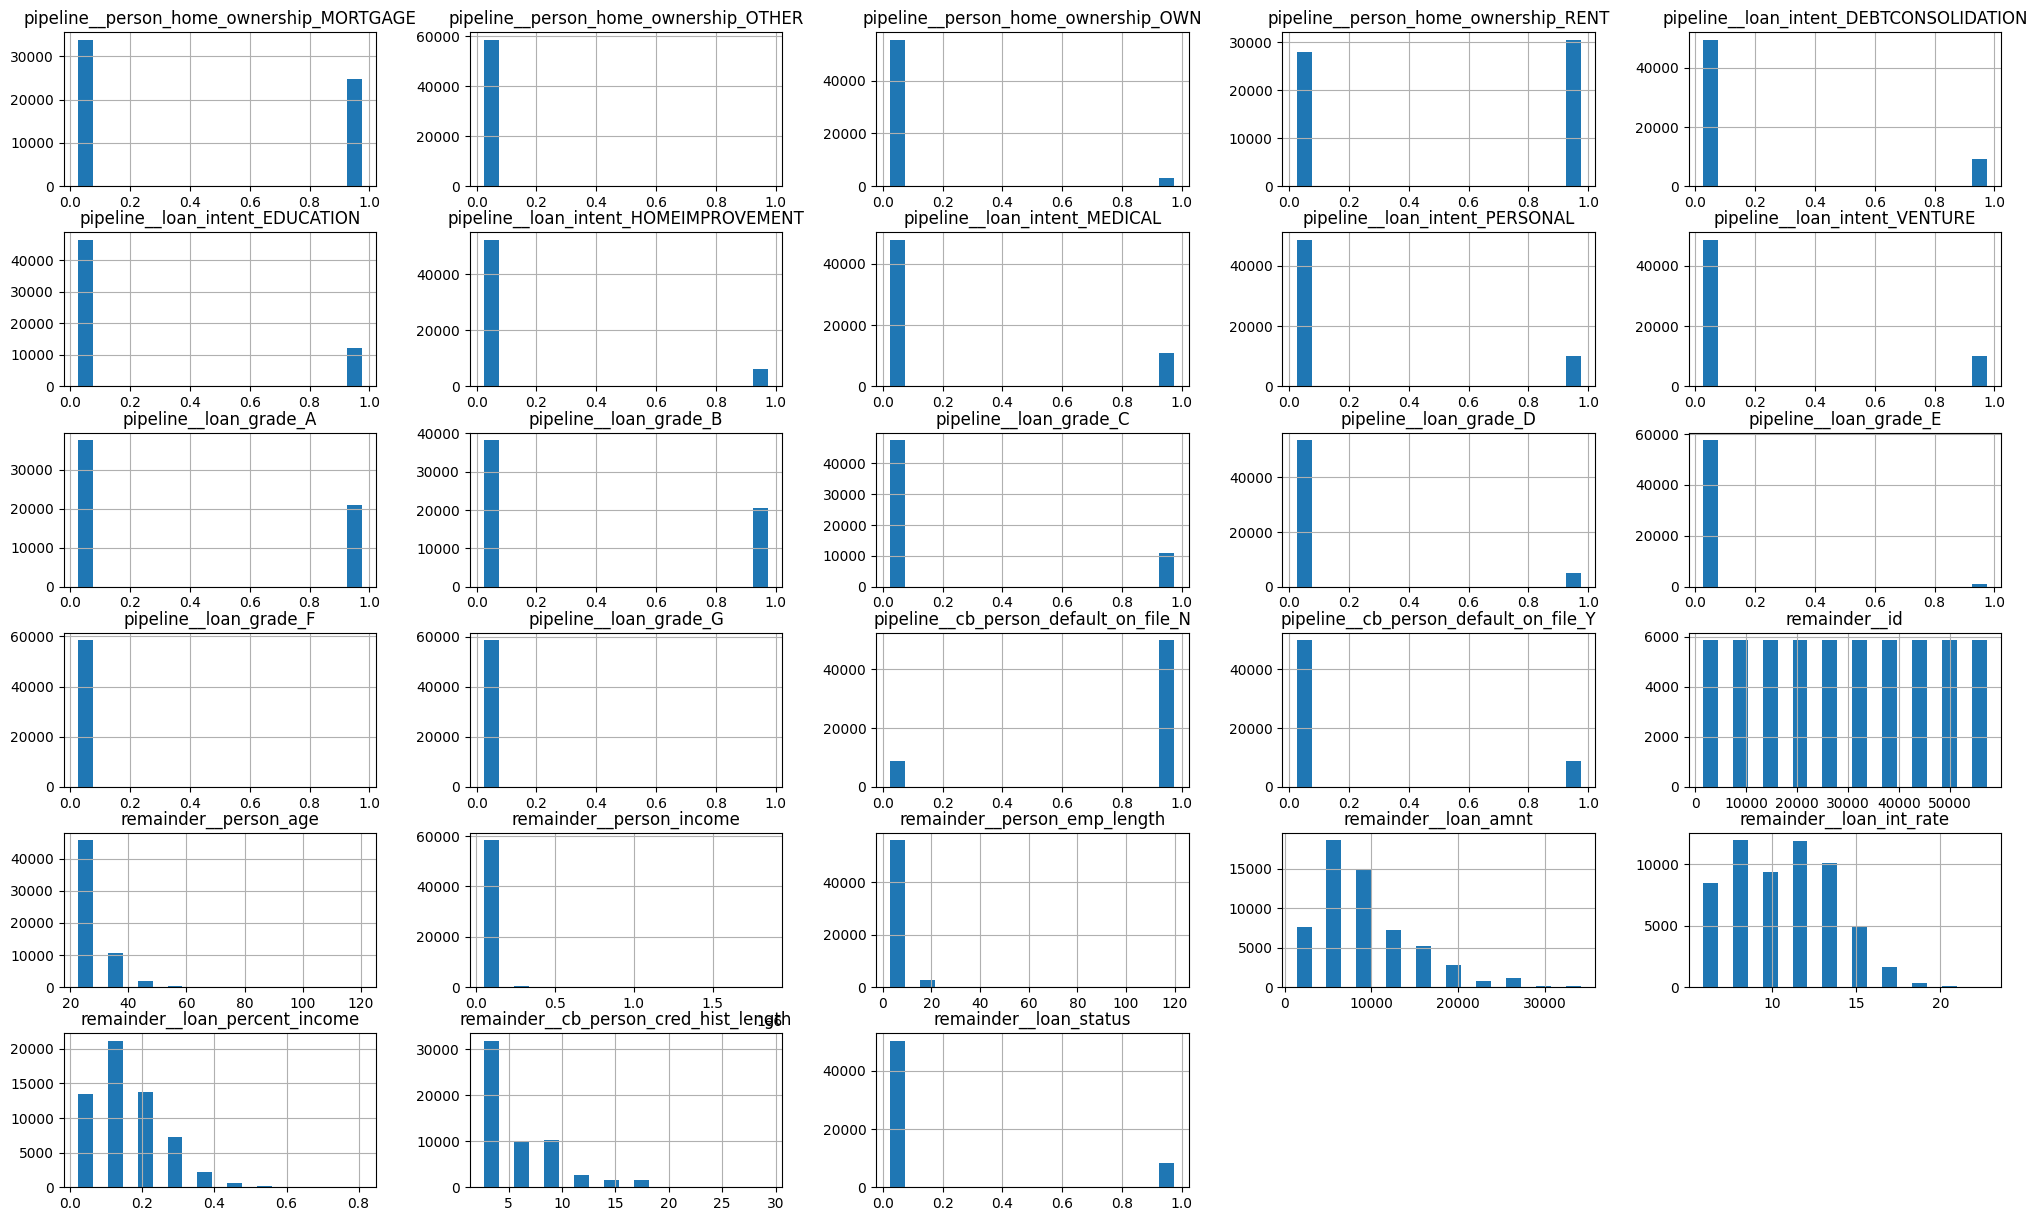

In [67]:
train.hist(bins=10,figsize=(25,15),rwidth=0.5)

<Axes: >

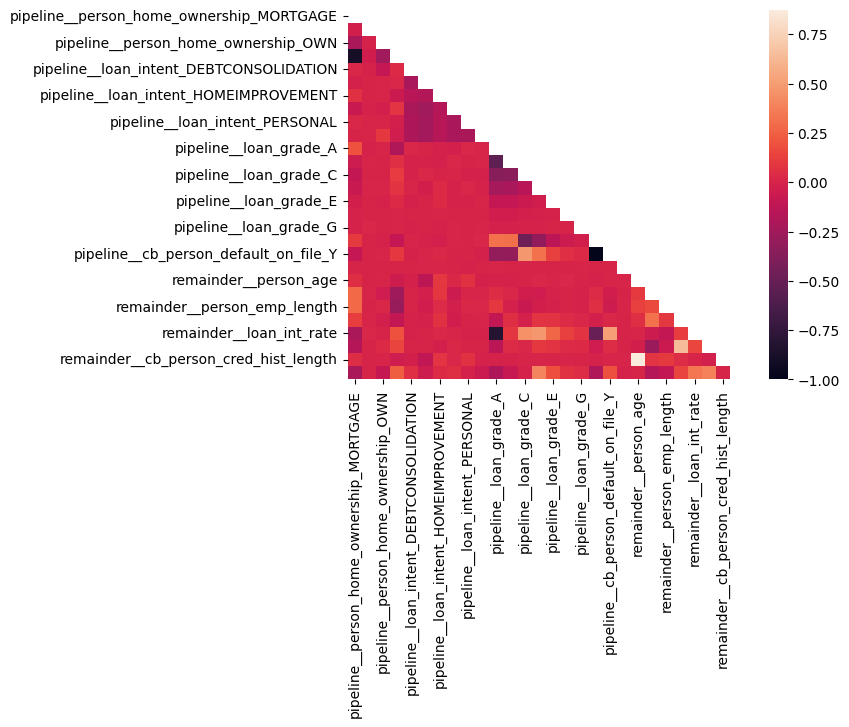

In [68]:
import seaborn as sns
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask)

In [69]:
corr.iloc[-1].sort_values()

pipeline__person_home_ownership_MORTGAGE   -0.202613
pipeline__loan_grade_A                     -0.199089
pipeline__cb_person_default_on_file_N      -0.186962
remainder__person_income                   -0.169956
remainder__person_emp_length               -0.100428
pipeline__person_home_ownership_OWN        -0.087556
pipeline__loan_grade_B                     -0.083765
pipeline__loan_intent_VENTURE              -0.064378
pipeline__loan_intent_EDUCATION            -0.051005
pipeline__loan_intent_PERSONAL             -0.012461
pipeline__loan_grade_C                     -0.009654
remainder__id                              -0.008138
remainder__cb_person_cred_hist_length      -0.003030
remainder__person_age                      -0.001130
pipeline__person_home_ownership_OTHER       0.002918
pipeline__loan_intent_HOMEIMPROVEMENT       0.031063
pipeline__loan_grade_G                      0.045889
pipeline__loan_intent_MEDICAL               0.049139
pipeline__loan_intent_DEBTCONSOLIDATION     0.

In [70]:
corr[(corr['remainder__loan_status'] > 0.1) | (corr['remainder__loan_status'] < -0.1)]['remainder__loan_status'].sort_values()


pipeline__person_home_ownership_MORTGAGE   -0.202613
pipeline__loan_grade_A                     -0.199089
pipeline__cb_person_default_on_file_N      -0.186962
remainder__person_income                   -0.169956
remainder__person_emp_length               -0.100428
remainder__loan_amnt                        0.144982
pipeline__loan_grade_E                      0.182878
pipeline__cb_person_default_on_file_Y       0.186962
pipeline__person_home_ownership_RENT        0.239620
remainder__loan_int_rate                    0.338948
remainder__loan_percent_income              0.378280
pipeline__loan_grade_D                      0.395646
remainder__loan_status                      1.000000
Name: remainder__loan_status, dtype: float64

# **Training and Test Data**

In [71]:
trainSet.sample(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
26705,26705,24,33195,RENT,3.0,DEBTCONSOLIDATION,B,1800,9.63,0.05,N,3,1
3243,3243,26,40000,RENT,0.0,PERSONAL,B,18000,10.65,0.45,N,4,1
13812,13812,24,18000,RENT,2.0,HOMEIMPROVEMENT,C,7600,13.06,0.42,Y,2,1
20312,20312,26,200000,MORTGAGE,10.0,MEDICAL,B,7500,12.18,0.04,N,3,0
31469,31469,27,37090,RENT,4.0,DEBTCONSOLIDATION,D,2400,16.29,0.06,N,8,1
27625,27625,22,23000,RENT,3.0,EDUCATION,C,6250,12.73,0.27,N,4,0
12038,12038,31,90000,RENT,5.0,MEDICAL,B,21500,11.36,0.24,N,5,0
53431,53431,30,90000,MORTGAGE,14.0,MEDICAL,A,6500,8.49,0.08,N,5,0
41146,41146,24,65000,MORTGAGE,5.0,PERSONAL,A,10000,7.49,0.15,N,4,0
33268,33268,29,140000,MORTGAGE,13.0,HOMEIMPROVEMENT,A,15000,6.03,0.11,N,8,0


In [72]:
train['person_income_cat'] = pd.cut(trainSet['person_income'],
       bins=[0.,100000,200000,300000,400000,500000,600_000,1_000_000,np.inf],
       labels=[1,2,3,4,5,6,7,8]
      )
train.sample(20)

,pipeline__person_home_ownership_MORTGAGE,pipeline__person_home_ownership_OTHER,pipeline__person_home_ownership_OWN,pipeline__person_home_ownership_RENT,pipeline__loan_intent_DEBTCONSOLIDATION,pipeline__loan_intent_EDUCATION,pipeline__loan_intent_HOMEIMPROVEMENT,pipeline__loan_intent_MEDICAL,pipeline__loan_intent_PERSONAL,pipeline__loan_intent_VENTURE,...,remainder__id,remainder__person_age,remainder__person_income,remainder__person_emp_length,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__loan_status,person_income_cat
2666,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2666.0,23.0,33195.0,5.0,2500.0,7.29,0.07,3.0,0.0,1
16676,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,16676.0,21.0,70000.0,2.0,3250.0,7.14,0.04,4.0,0.0,1
15715,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,15715.0,25.0,29000.0,7.0,11500.0,13.49,0.39,4.0,1.0,1
23697,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,23697.0,34.0,84000.0,5.0,20000.0,13.49,0.24,5.0,0.0,1
53204,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,53204.0,35.0,39000.0,2.0,3000.0,17.19,0.08,6.0,1.0,1
7993,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7993.0,24.0,40000.0,1.0,2300.0,15.96,0.06,4.0,0.0,1
8287,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,8287.0,37.0,78000.0,3.0,6000.0,9.63,0.08,16.0,0.0,1
54331,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,54331.0,24.0,40800.0,1.0,13200.0,15.28,0.33,3.0,1.0,1
55909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,55909.0,26.0,39915.0,10.0,14000.0,16.29,0.35,2.0,1.0,1
30161,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,30161.0,26.0,24000.0,0.0,6400.0,13.85,0.27,3.0,0.0,1


In [73]:
train['person_income_cat'].value_counts()

person_income_cat
1    52829
2     5572
3      170
4       31
7       18
5       12
6        8
8        5
Name: count, dtype: int64

In [80]:
columns_considered = ["pipeline__person_home_ownership_MORTGAGE","pipeline__loan_grade_A","pipeline__cb_person_default_on_file_N","remainder__person_income","remainder__person_emp_length","pipeline__person_home_ownership_OWN","pipeline__loan_grade_B","pipeline__loan_grade_C","pipeline__person_home_ownership_OTHER","pipeline__loan_intent_HOMEIMPROVEMENT","pipeline__loan_grade_G","pipeline__loan_intent_MEDICAL","pipeline__loan_intent_DEBTCONSOLIDATION","pipeline__loan_grade_F","remainder__loan_amnt","pipeline__loan_grade_E","pipeline__cb_person_default_on_file_Y","pipeline__person_home_ownership_RENT","remainder__loan_int_rate","remainder__loan_percent_income","pipeline__loan_grade_D","person_income_cat"]
X = train[columns_considered]
y=train['remainder__loan_status']

**Stratified group K-Fold** 

In [85]:
from sklearn.model_selection import StratifiedGroupKFold
sgkf = StratifiedGroupKFold(n_splits=5)
groups = sgkf.split(X,y,groups=X['person_income_cat'])

# **Model Building**